# Figure used for Illustrating Simulated Data

In [1]:
# import relevant packages 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy.stats import beta, norm, lognorm
from scipy.ndimage import gaussian_filter1d
from scipy.signal import welch

from src.data.create_simulated_data import SimulateData
from src.data.utils import read_ns5_file, time_to_freq
sns.set_theme()


**SA**

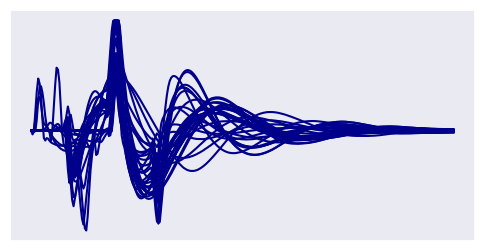

In [3]:
SA_options = np.load("../data/noise_files_sim_data/SA_time.npy")
plt.figure(figsize=(6, 3))
plt.plot(SA_options.T, color ="darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_SA.pdf")
plt.show()

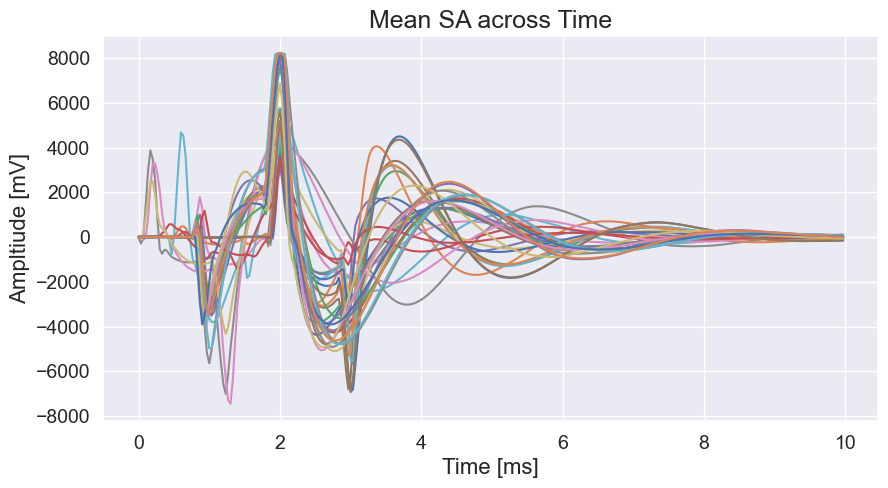

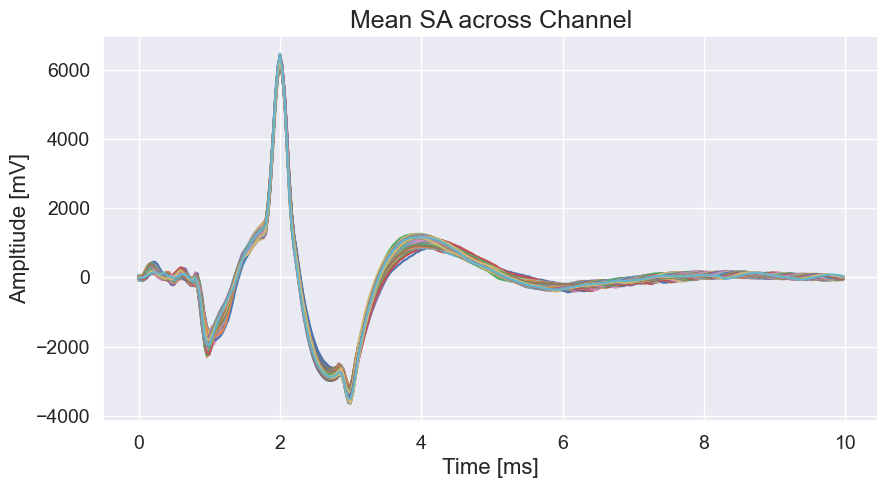

In [23]:
SA_options1 = np.load("../data/noise_files_sim_data/SA_time.npy")
SA_options2 = np.load("../data/noise_files_sim_data/SA_channel.npy")
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

x_axis = np.arange(0, 300) / 30 
plt.figure(figsize=(10, 5))
plt.plot(x_axis, SA_options1.T)
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.title("Mean SA across Time", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_SA_time.pdf")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_axis, SA_options2.T)
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.title("Mean SA across Channel", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_SA_channel.pdf")
plt.show()

**CAP**

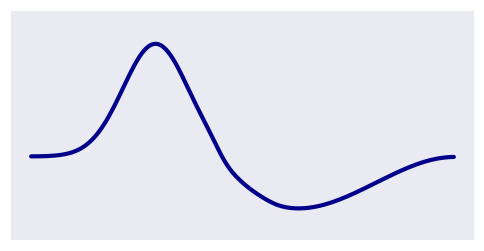

In [28]:
y1 = norm.pdf(np.linspace(-2, 1, 80), 0, 0.5)# beta.pdf(np.linspace(0, 1, 100), 2, 3)
y2 = beta.pdf(np.linspace(0, 1, 100), 2, 3)
Y = np.r_[4*y1, -0.8*y2]
Y[len(Y)//2-10:len(Y) // 2 + 10] = gaussian_filter1d(Y[len(Y)//2-10:len(Y) // 2 + 10], 4)
Y = gaussian_filter1d(Y, 4)
Y /= np.max(Y)
# Y *= 30 

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (6, 3))
plt.plot(x_axis, Y, linewidth = 3, color = "darkblue")
plt.ylim([-0.75, 1.3])
plt.yticks([])
plt.xticks([])
plt.savefig("../../../figures/stim_data_CAP1.pdf")
plt.show()

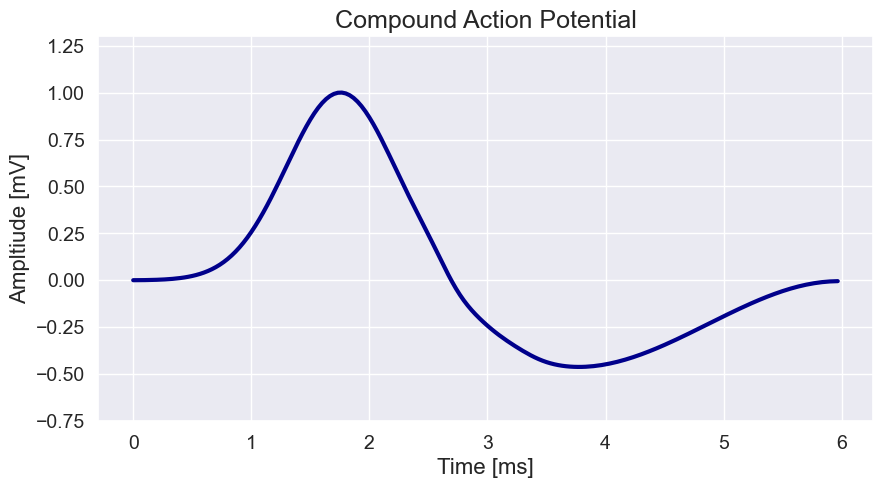

In [29]:
y1 = norm.pdf(np.linspace(-2, 1, 80), 0, 0.5)# beta.pdf(np.linspace(0, 1, 100), 2, 3)
y2 = beta.pdf(np.linspace(0, 1, 100), 2, 3)
Y = np.r_[4*y1, -0.8*y2]
Y[len(Y)//2-10:len(Y) // 2 + 10] = gaussian_filter1d(Y[len(Y)//2-10:len(Y) // 2 + 10], 4)
Y = gaussian_filter1d(Y, 4)
Y /= np.max(Y)
# Y *= 30 

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (10, 5))
plt.plot(x_axis, Y, linewidth = 3, color = "darkblue")
plt.ylim([-0.75, 1.3])
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.title("Compound Action Potential", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_CAP_report.pdf")
plt.show()

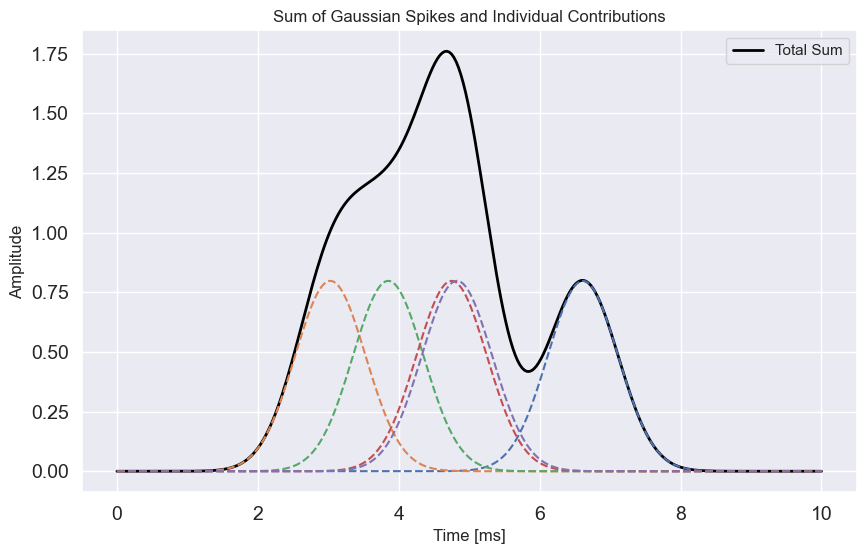

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def evaluate_gaussian_sum(x, centers, sigma):
    """
    Evaluate the sum of Gaussian functions at points x given a list of centers and standard deviation.
    
    Parameters:
    - x (np.ndarray): Array of time points where the function is evaluated.
    - centers (list or np.ndarray): Centers of the Gaussian spikes.
    - sigma (float): Standard deviation of the Gaussian spikes.
    
    Returns:
    - total (np.ndarray): The total sum of Gaussians at each point x.
    - contributions (list of np.ndarray): List of individual Gaussian contributions.
    """
    contributions = [norm.pdf(x, loc=center, scale=sigma) for center in centers]
    total = np.sum(contributions, axis=0)
    return total, contributions

def plot_gaussian_sum(x, total, contributions, centers):
    """
    Plot the sum of Gaussian functions and their individual contributions.
    
    Parameters:
    - x (np.ndarray): Array of time points where the function is evaluated.
    - total (np.ndarray): The total sum of Gaussians at each point x.
    - contributions (list of np.ndarray): List of individual Gaussian contributions.
    - centers (list or np.ndarray): Centers of the Gaussian spikes (used for annotation).
    """
    plt.figure(figsize=(10, 6))
    
    # Plot the total sum
    plt.plot(x, total, label="Total Sum", color="black", linewidth=2)
    
    # Plot individual contributions
    for i, contribution in enumerate(contributions):
        plt.plot(x, contribution, linestyle="--")
    
    # Add labels and legend
    plt.xlabel("Time [ms]")
    plt.ylabel("Amplitude")
    plt.title("Sum of Gaussian Spikes and Individual Contributions")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
x = np.linspace(0, 10, 10*30)  # Define time points
centers = np.random.uniform(3, 7, 5)  # Define Gaussian centers
sigma = 0.5  # Define standard deviation

# Evaluate the Gaussian sum and plot
total, contributions = evaluate_gaussian_sum(x, centers, sigma)
plot_gaussian_sum(x, total, contributions, centers)


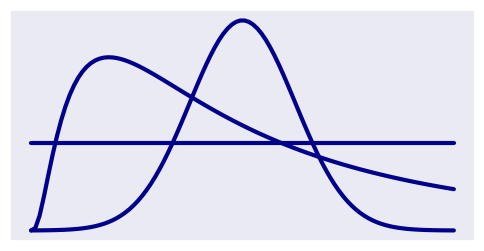

In [2]:
norm_dist = norm.pdf(np.linspace(-2, 2, 100), 0, 0.5)
lognorm_dist = lognorm.pdf(np.linspace(0, 2, 100), 1)
uniform_dist = np.ones(100) / 3

plt.figure(figsize = (6, 3))
plt.plot(norm_dist, linewidth = 3, color = "darkblue")
plt.plot(lognorm_dist, linewidth = 3, color = "darkblue")
plt.plot(uniform_dist, linewidth = 3, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_CAP2.pdf")
plt.show()

**Noise**

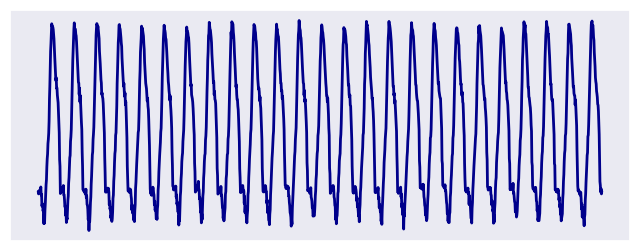

In [12]:
noise_500 = np.load("../data/noise_files_sim_data/500_Hz.npy")
plt.figure(figsize = (8, 3))
plt.plot(noise_500[:1500], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_noise1.pdf")
plt.show()

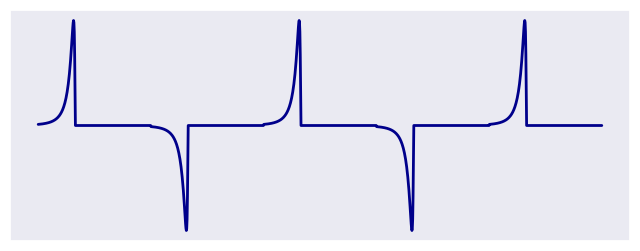

In [13]:
# PLI
length = 300300
fs = 3*1e4 
spike = np.flip(lognorm.pdf(np.linspace(0, 3, 100), 1, 0, 0.4))
hertz_20_ms = int(20 * fs // 1000)
num_spikes = int(length / hertz_20_ms) 
spike = spike / np.max(spike) 


spike_train = np.zeros(length)
for i in range(num_spikes):
    spike_train[hertz_20_ms * i: (hertz_20_ms * i + len(spike))]  = spike
    spike_train[hertz_20_ms * i- hertz_20_ms //2 : (hertz_20_ms * i + len(spike) - hertz_20_ms // 2)] -= spike

plt.figure(figsize = (8, 3))
plt.plot(spike_train[:1500], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_noise2.pdf")
plt.show()

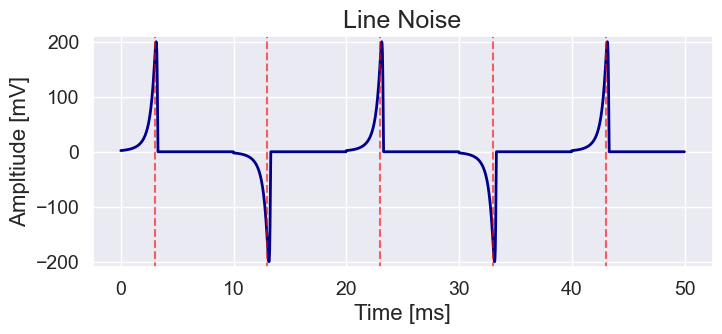

In [147]:
# PLI
length = 300300
fs = 3*1e4 
spike = np.flip(lognorm.pdf(np.linspace(0, 3, 100), 1, 0, 0.4))
hertz_20_ms = int(20 * fs // 1000)
num_spikes = int(length / hertz_20_ms) 
spike = spike / np.max(spike) 


spike_train = np.zeros(length)
for i in range(num_spikes):
    spike_train[hertz_20_ms * i: (hertz_20_ms * i + len(spike))]  = spike
    spike_train[hertz_20_ms * i- hertz_20_ms //2 : (hertz_20_ms * i + len(spike) - hertz_20_ms // 2)] -= spike

x_axis = np.arange(0, 1500) / 30
plt.figure(figsize = (8, 3))
plt.plot(x_axis, spike_train[:1500]*200, linewidth = 2, color = "darkblue")
plt.title("Line Noise", fontdict={"fontsize": 18})
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.vlines([3, 13, 23, 33, 43], ymin = -215, ymax = 215, color = "red", linestyle = "--", alpha = 0.6)
plt.ylim([-210, 210])
plt.savefig("../../../figures/stim_data_noise2_report.pdf")
plt.show()

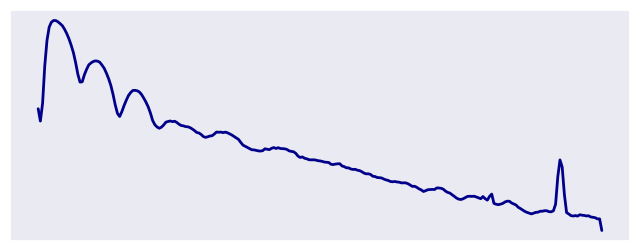

In [24]:
# high frequency noise
times, data = read_ns5_file("../../data/raw/Ramp data/Eye 3/ramp_file6.ns5")

xf, yf = time_to_freq(data[:, 10])
p, fxx = welch(np.mean(data, axis = 1), fs = 30000, nperseg = 512)

plt.figure(figsize = (8, 3))
plt.plot(p, 20 * np.log(fxx), linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_noise3.pdf")
plt.show()


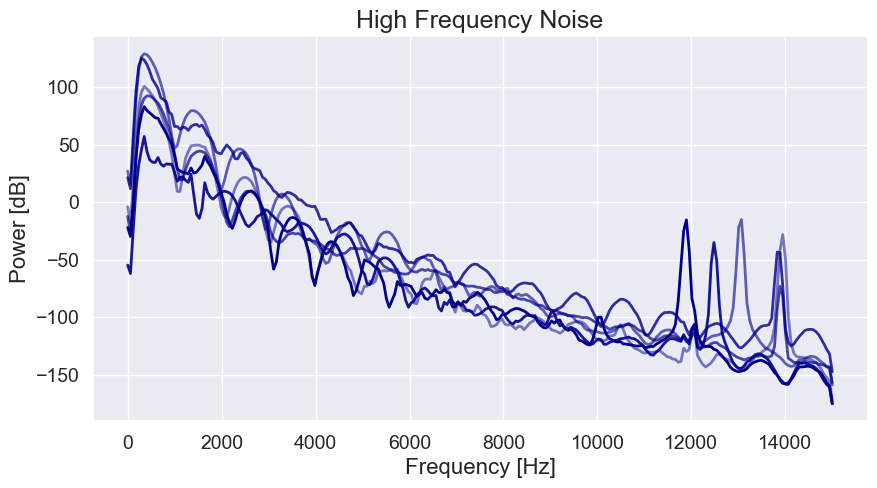

In [155]:
# high frequency noise
plt.figure(figsize = (10, 5))
for i in range(1, 7):
    times, data = read_ns5_file(f"../../data/raw/Ramp data/Eye {i}/ramp_file6.ns5")

    xf, yf = time_to_freq(data[:, 10])
    p, fxx = welch(np.mean(data, axis = 1), fs = 30000, nperseg = 512)


    plt.plot(p, 20 * np.log(fxx), linewidth = 2, color = "darkblue", alpha = i*0.1+0.4)

plt.xlabel("Frequency [Hz]", fontdict={"fontsize": 16})
plt.ylabel("Power [dB]", fontdict={"fontsize": 16})
plt.title("High Frequency Noise", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_noise3_report.pdf")
plt.show()


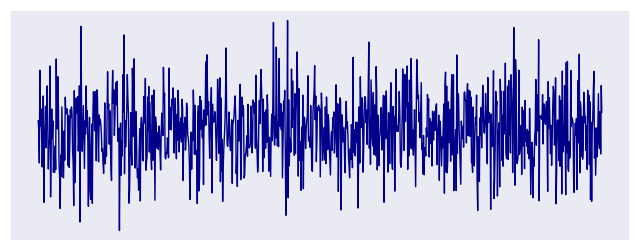

In [8]:
# white noise 
white_noise = np.random.normal(0, 1, 1000)
plt.figure(figsize = (8, 3))
plt.plot(white_noise, color = "darkblue", linewidth = 1)
plt.xticks([])
plt.yticks([])
# plt.savefig("../../../figures/stim_data_noise4.pdf")
plt.show()

**Signal**

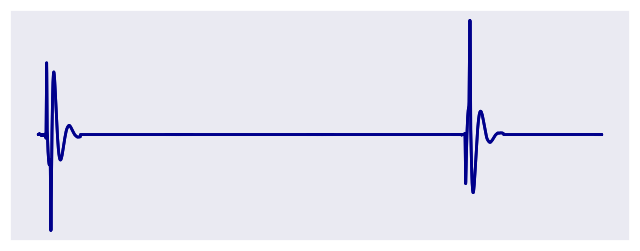

In [9]:
# Only with stimulation artifacts 
simulator = SimulateData([0, 0, 0], stim_freq=10, CAP_amp=0)
simulator.construct_signal()

plt.figure(figsize = (8, 3))
plt.plot(simulator.signal[:4000], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_signal1.pdf")
plt.show()

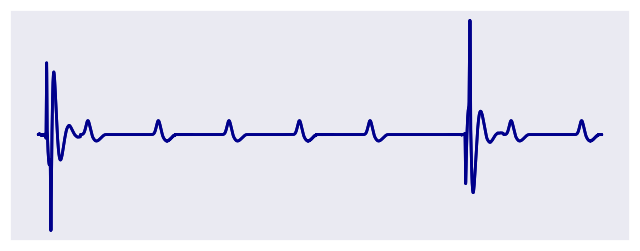

In [10]:
# stimulation artifacts and cap 
simulator = SimulateData([0, 0, 0], stim_freq=10, CAP_amp=1000)
simulator.construct_signal()

plt.figure(figsize = (8, 3))
plt.plot(simulator.signal[:4000], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_signal2.pdf")
plt.show()

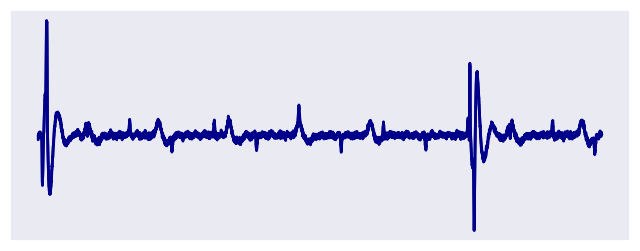

In [11]:
# stimulation artifacts and cap and noise 
simulator = SimulateData([1000, 100, 100], stim_freq=10, CAP_amp=1000)
simulator.construct_signal()

plt.figure(figsize = (8, 3))
plt.plot(simulator.signal[:4000], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_signal3.pdf")
plt.show()